# Projeto de dados do mercado financeiro

Neste projeto de dados, nos concentraremos na análise de dados exploratórios dos preços das ações. Tenha em mente que este projeto apenas pretende praticar suas habilidades de visualização e pandas, não é para ser uma análise financeira robusta ou ser tomado como um conselho financeiro.
____
** NOTA: Este projeto é extremamente desafiador, porque irá introduzir muitos novos conceitos e te fará procurar as coisas por conta própria (vamos apontar você na direção certa) para tentar resolver as tarefas emitidas. Sinta-se à vontade para passar pelo livro de conferências de soluções e no vídeo como um projeto "passo a passo" se você não quer ter que procurar as coisas sozinho. Você ainda aprenderá muito dessa forma! **
____
Vamos nos concentrar nas ações dos banco e ver como eles performaram durante a [crise financeira](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) até o início de 2016.

## Obter dados

Nesta seção, aprenderemos a usar pandas para ler diretamente os dados das finanças do Google usando pandas!

Primeiro, precisamos começar com as importações adequadas, que já apresentamos para você aqui.

* Nota: [Você precisará instalar pandas-datareader para que isso funcione!](Https://github.com/pydata/pandas-datareader) O datareader Pandas permite que você [leia informações das ações diretamente da internet](http : //pandas.pydata.org/pandas-docs/stable/remote_data.html) Use estes links para orientação de instalação (** pip install pandas-datareader **), ou simplesmente acompanhe a conferência de vídeo. *

### Os Imports

Já preenchidos para você.

In [11]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
%matplotlib inline

## Dados

Precisamos obter dados usando o datareader de pandas. Obteremos informações sobre ações para os seguintes bancos:
* Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

** Descubra como obter os dados de ações de 1 de janeiro de 2006 a 1º de janeiro de 2016 para cada um desses bancos. Defina cada banco como um dataframe separado, com o nome da variável para que esse banco seja seu símbolo de ticker. Isso envolverá algumas etapas: **
1. Use datetime para definir objetos de início e fim de data e hora.
2. Descobrir o símbolo do ticker para cada banco.
2. Descubra como usar o datareader para pegar as cotações.

** Use [esta página de documentação](http://pandas.pydata.org/pandas-docs/stable/remote_data.html) para obter dicas e instruções. Use o google finance como um fonte, por exemplo: **
    
     # Banco da América
     BAC = data.DataReader ("BAC", "google", início e fim)


In [12]:
start = '2006-01-01'
end = '2016-01-01'

In [13]:
# Bank of America
BAC = data.DataReader("BAC", 'yahoo', start, end)

# CitiGroup
C = data.DataReader("C", 'yahoo', start, end)

# Goldman Sachs
GS = data.DataReader("GS", 'yahoo', start, end)

# JPMorgan Chase
JPM = data.DataReader("JPM", 'yahoo', start, end)

# Morgan Stanley
MS = data.DataReader("MS", 'yahoo', start, end)

# Wells Fargo
WFC = data.DataReader("WFC", 'yahoo', start, end)


TypeError: string indices must be integers

** Crie uma lista dos símbolos dos tickers (como strings) em ordem alfabética. Chame esta lista: tickers **

In [7]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

** Use pd.concat para concatenar os DataFrames do banco juntos em um único chamado bank_stocks. Defina o argumento das chaves igual à lista de tickers. Também preste atenção em que eixo você concatena. **

In [8]:
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC], axis=1, keys=tickers)

** Defina os níveis dos nomes das colunas (este é preenchido para você): **

In [9]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

** Verifique o cabeçalho do DataFrame bank_stocks. **

In [20]:
bank_stocks.head()

Bank Ticker    BAC                                     C                       \
Stock Info    Open   High    Low  Close    Volume   Open   High    Low  Close   
Date                                                                            
2006-01-03   46.92  47.18  46.15  47.08  16296700  490.0  493.8  481.1  492.9   
2006-01-04   47.00  47.24  46.45  46.58  17757900  488.6  491.0  483.5  483.8   
2006-01-05   46.58  46.83  46.32  46.64  14970900  484.4  487.8  484.0  486.2   
2006-01-06   46.80  46.91  46.35  46.57  12599800  488.8  489.0  482.0  486.2   
2006-01-09   46.72  46.97  46.36  46.60  15620000  486.0  487.4  483.0  483.9   

Bank Ticker             ...        MS                                  WFC  \
Stock Info    Volume    ...      Open   High    Low  Close   Volume   Open   
Date                    ...                                                  
2006-01-03   1537660    ...     57.17  58.49  56.74  58.31  5377000  31.60   
2006-01-04   1871020    ...     58.70  59.28  58.35  58.35  7977800  31.80   
2006-01-05   1143160    ...     58.55  58.59  58.02  58.51  5778000  31.50   
2006-01-06   1370250    ...     58.77  58.85  58.05  58.57  6889800  31.58   
2006-01-09   1680740    ...     58.63  59.29  58.62  59.19  4144500  31.68   

Bank Ticker                                 
Stock Info    High    Low  Close    Volume  
Date                                        
2006-01-03   31.98  31.20  31.90  11016400  
2006-01-04   31.82  31.36  31.53  10871000  
2006-01-05   31.56  31.31  31.50  10158000  
2006-01-06   31.78  31.38  31.68   8403800  
2006-01-09   31.82  31.56  31.68   5619600  

[5 rows x 30 columns]

# Análise de dados exploratória

Vamos explorar os dados um pouco! Antes de prosseguir, sugiro que você verifique a documentação no [Multi-Level Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html) e [como usar .xs](http: // pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html).
Consulte as soluções se você não consiga descobrir como usar .xs (), uma vez que isso será uma parte importante desse projeto.

** Qual é o preço máximo de fechamento para cada banco durante todo o período? **

In [58]:
bank_stocks.xs(key='Close', axis=1, level='Stock Info').max()

Bank Ticker
BAC     54.90
C      564.10
GS     247.92
JPM     70.08
MS      89.30
WFC     58.52
dtype: float64

** Crie um novo DataFrame vazio chamado returns. Este dataframe conterá os retornos para o ação de cada banco. Os retornos geralmente são definidos por: **

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

** Podemos usar o método pct_change () pandas na coluna close para criar uma coluna que represente esse valor de retorno. Crie um loop for que vá e para cada Bank Stock Ticker cria essa coluna de retorno e configura-a como uma coluna nos dados DataFrame. **

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.000951
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005714
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,0.000000


** Crie um parplot utilizando seaborn no dataframe de retorno. **

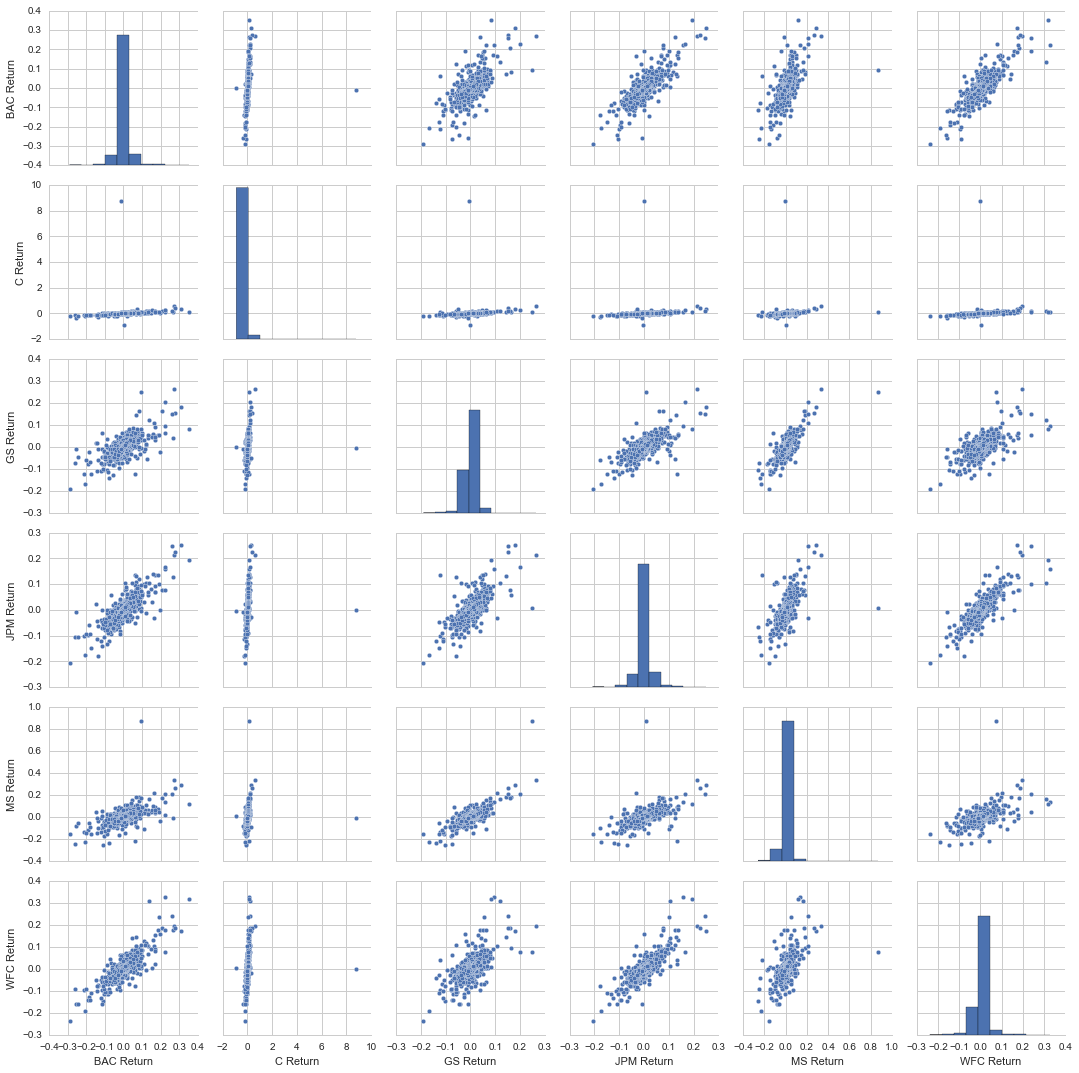

** Usando o seu DataFrame returns, descubra quais datas cada ação dos bancos teve o melhor e o pior dia de retorno. Você deve notar que 4 dos bancos compartilham o mesmo dia para a pior queda. Alguma coisa significante aconteceu naquele dia? **

BAC Return   2009-01-20
C Return     2011-05-06
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

BAC Return   2009-04-09
C Return     2011-05-09
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

** Dê uma olhada no desvio padrão dos retornos. Qual ação você classificaria como a mais arriscada durante todo o período de tempo? Qual você classificaria como a mais arriscado para o ano 2015? **

BAC Return    0.036650
C Return      0.179969
GS Return     0.025346
JPM Return    0.027656
MS Return     0.037820
WFC Return    0.030233
dtype: float64

BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64

** Crie um distplot usando seaborn dos retornos de 2015 para Morgan Stanley **

/Users/marci/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning:

using a non-integer number instead of an integer will result in an error in the future



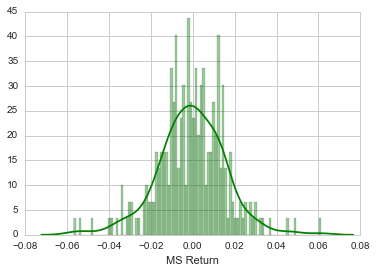

** Crie um distplot usando seaborn dos retornos de 2008 para CitiGroup **

/Users/marci/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning:

using a non-integer number instead of an integer will result in an error in the future



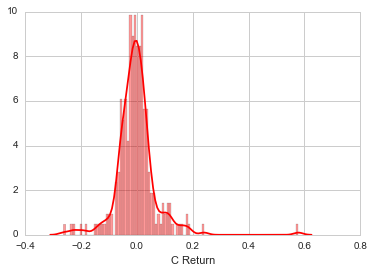

# Mais visualização

Muito desse projeto se concentrará em visualizações. Sinta-se livre para usar qualquer uma das suas bibliotecas de visualização preferidas para tentar recriar os plots descritos abaixo, seaborn, matplotlib, plotly e cufflinks, ou apenas pandas.

### Importações

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

** Crie um gráfico de linha mostrando o preço de fechamento para cada banco para todo o índice de tempo. (Sugestão: tente usar um loop for ou use [.xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html) para obter uma seção transversal dos dados .) **

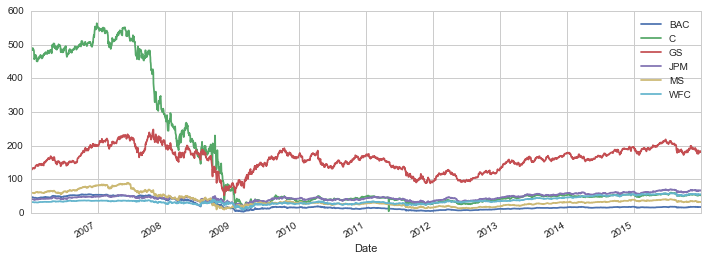

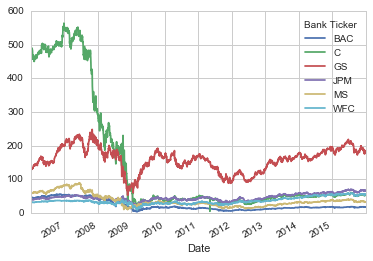

## Médias móveis

Vamos analisar as médias móveis para essas ações no ano de 2008.

** Trace a média de 30 dias para o preço do Bank Of America para o ano de 2008 **

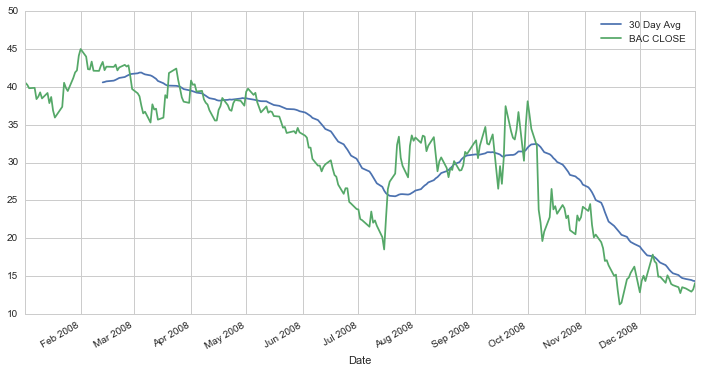

** Crie um mapa de calor da correlação entre os preços de fechamento das ações. **

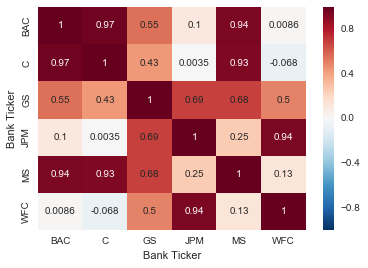

** Opcional: use o clustermap do seaborn para agrupar as correlações: **

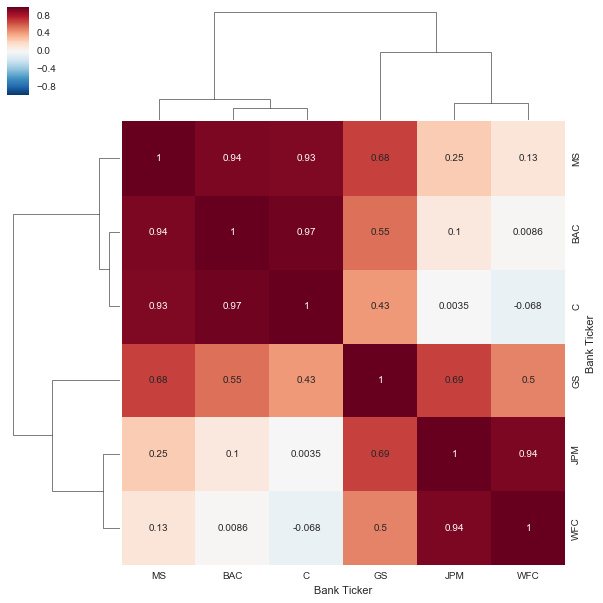

Definitivamente, muitos tópicos de finanças específicos aqui, então não se preocupe se você não os entendeu todos! A única coisa que você deve estar preocupado com a compreensão são os pandas básicos e operações de visualização.